In [1]:
import matplotlib.pyplot as plt
import matplotlib
from pylab import figure, text, scatter, show
import sys, math, numpy
import seaborn as sns
sns.set_theme()
sns.set_style(style='white')
sns.set_style("ticks")

In [2]:
def get_cluster_label(sysname):
    """Get the labels for each cluster."""
    return numpy.load(f"../4.dim_red/clusters_{sysname}.npy")

def get_latent_displacement(sysname, edge):
    """Get the latent displacement from feature perturbation."""
    _lt_basedir = "/scratch/users/zilins/6.proj_ges_imi/3.gnn/model_latent_pert"
    _ds_basedir = "/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    edge_latent = numpy.load(f"{_lt_basedir}/{sysname}_pert_latent.npy")
    edge_label  = numpy.load(f"{_ds_basedir}/label_edges.npy")
    latent = edge_latent[:, numpy.squeeze(numpy.where(edge==edge_label)), :]
    return numpy.sum(numpy.abs(latent), axis=1)

def get_dist(sysname, distlabel):
    """Get the distances for a edge in sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    edge_label = numpy.load(f"{_basedir}/label_edges.npy")
    edge_dist  = numpy.load(f"{_basedir}/ges_imi.{sysname}.edge_dist.npy")
    i = numpy.where(distlabel==edge_label)
    dist = numpy.squeeze(edge_dist[:, i])
    return dist

def get_chrg(sysname, chrglabel):
    """Get the NBO charges for a edge in sys."""
    _basedir = f"/scratch/users/zilins/6.proj_ges_imi/2.datasets/rawds"
    node_labels = numpy.load(f"{_basedir}/label_nodes.npy")
    chrg_arrays = numpy.load(f"{_basedir}/ges_imi.{sysname}.node_nbo.npy")
    i = numpy.where(chrglabel==node_labels)
    chrg = numpy.squeeze(chrg_arrays[:, i])
    return chrg

edge_list = ["SER.64.OG:LYS.67.HZ1",     "GLU.161.OE1:TIP3.287.H1",  "IMI.286.C7:TIP3.287.OH2",
             "SER.64.OG:LYS.67.HZ3",     "ASN.127.OD1:LYS.67.HZ2",   "ASN.127.OD1:IMI.286.H15O", "GLU.161.OE1:LYS.67.HZ2", 
             "GLU.161.OE2:SER.165.HG1",  "GLU.161.OE1:IMI.286.H15O", "SER.165.OG:TIP3.287.H2",   "IMI.286.O15:LYS.67.HZ1",   
             "IMI.286.O15:ASN.127.HD22", "IMI.286.C7:IMI.286.O15",   "TIP3.287.OH2:LYS.67.HZ1",  "TIP3.287.OH2:IMI.286.H15O",
             "SER.64.OG:SER.64.HG1",     "IMI.286.O7:SER.64.HG1"
            ]
edge_label= [r"Ser70 O$\gamma$ - Lys73 H$\zeta$1",      r"Glu166 O$\epsilon$1 - Water H1",        "IPM C7 - Water O",
             r"Ser70 O$\gamma$ - Lys73 H$\zeta$3",      r"Asn132 O$\delta$ - Lys73 H$\zeta$2",    r"Asn132 O$\delta$ - IPM HO6$\alpha$",  r"Glu166 O$\epsilon$1 - Lys73 H$\zeta$2",
             r"Glu166 O$\epsilon$2 - Ser170 H$\gamma$", r"Glu166 O$\epsilon$1 - IPM HO6$\alpha$", r"Ser170 O$\gamma$ - Water H2", r"IPM O6$\alpha$ - Lys73 H$\zeta$1",
             r"IPM O6$\alpha$ - Asn132 H$\delta$2",     r"IPM C7 - IPM O6$\alpha$",               r"Water O - Lys73 H$\zeta$1",   r"Water O - IPM HO6$\alpha$",
             r"Ser70 O$\gamma$ - IPM H4",     "IPM O7 - IPM H4"]

edge1 = numpy.asarray([get_dist('d1', el) for el in edge_list]).T[:, :15]
edge2 = numpy.asarray([get_dist('d2', el) for el in edge_list]).T


=== Variances below 0.5 were discarded, take only hydrogen bonds.

0   Ser70 O$\gamma$ - Lys73 H$\zeta$1        0.013085709712142478
1   Glu166 O$\epsilon$1 - Water H1           0.003099393566720259
2   IPM C7 - Water O                         0.05246539437509232 
3   Ser70 O$\gamma$ - Lys73 H$\zeta$3        0.01997228497620897 
4   Asn132 O$\delta$ - Lys73 H$\zeta$2       0.021957705987887266
5   Asn132 O$\delta$ - IPM HO6$\alpha$       0.8359535873114565  
6   Glu166 O$\epsilon$1 - Lys73 H$\zeta$2    0.029425094721902093
7   Glu166 O$\epsilon$2 - Ser170 H$\gamma$   0.009424169640449136
8   Glu166 O$\epsilon$1 - IPM HO6$\alpha$    1.160024332997998   
9   Ser170 O$\gamma$ - Water H2              0.00275790934136009 
10  IPM O6$\alpha$ - Lys73 H$\zeta$1         0.7764546243973688  
11  IPM O6$\alpha$ - Asn132 H$\delta$2       0.33602265928701786 
12  IPM C7 - IPM O6$\alpha$                  0.10423616782673585 
13  Water O - Lys73 H$\zeta$1                0.18006730459667672 
14  Wate

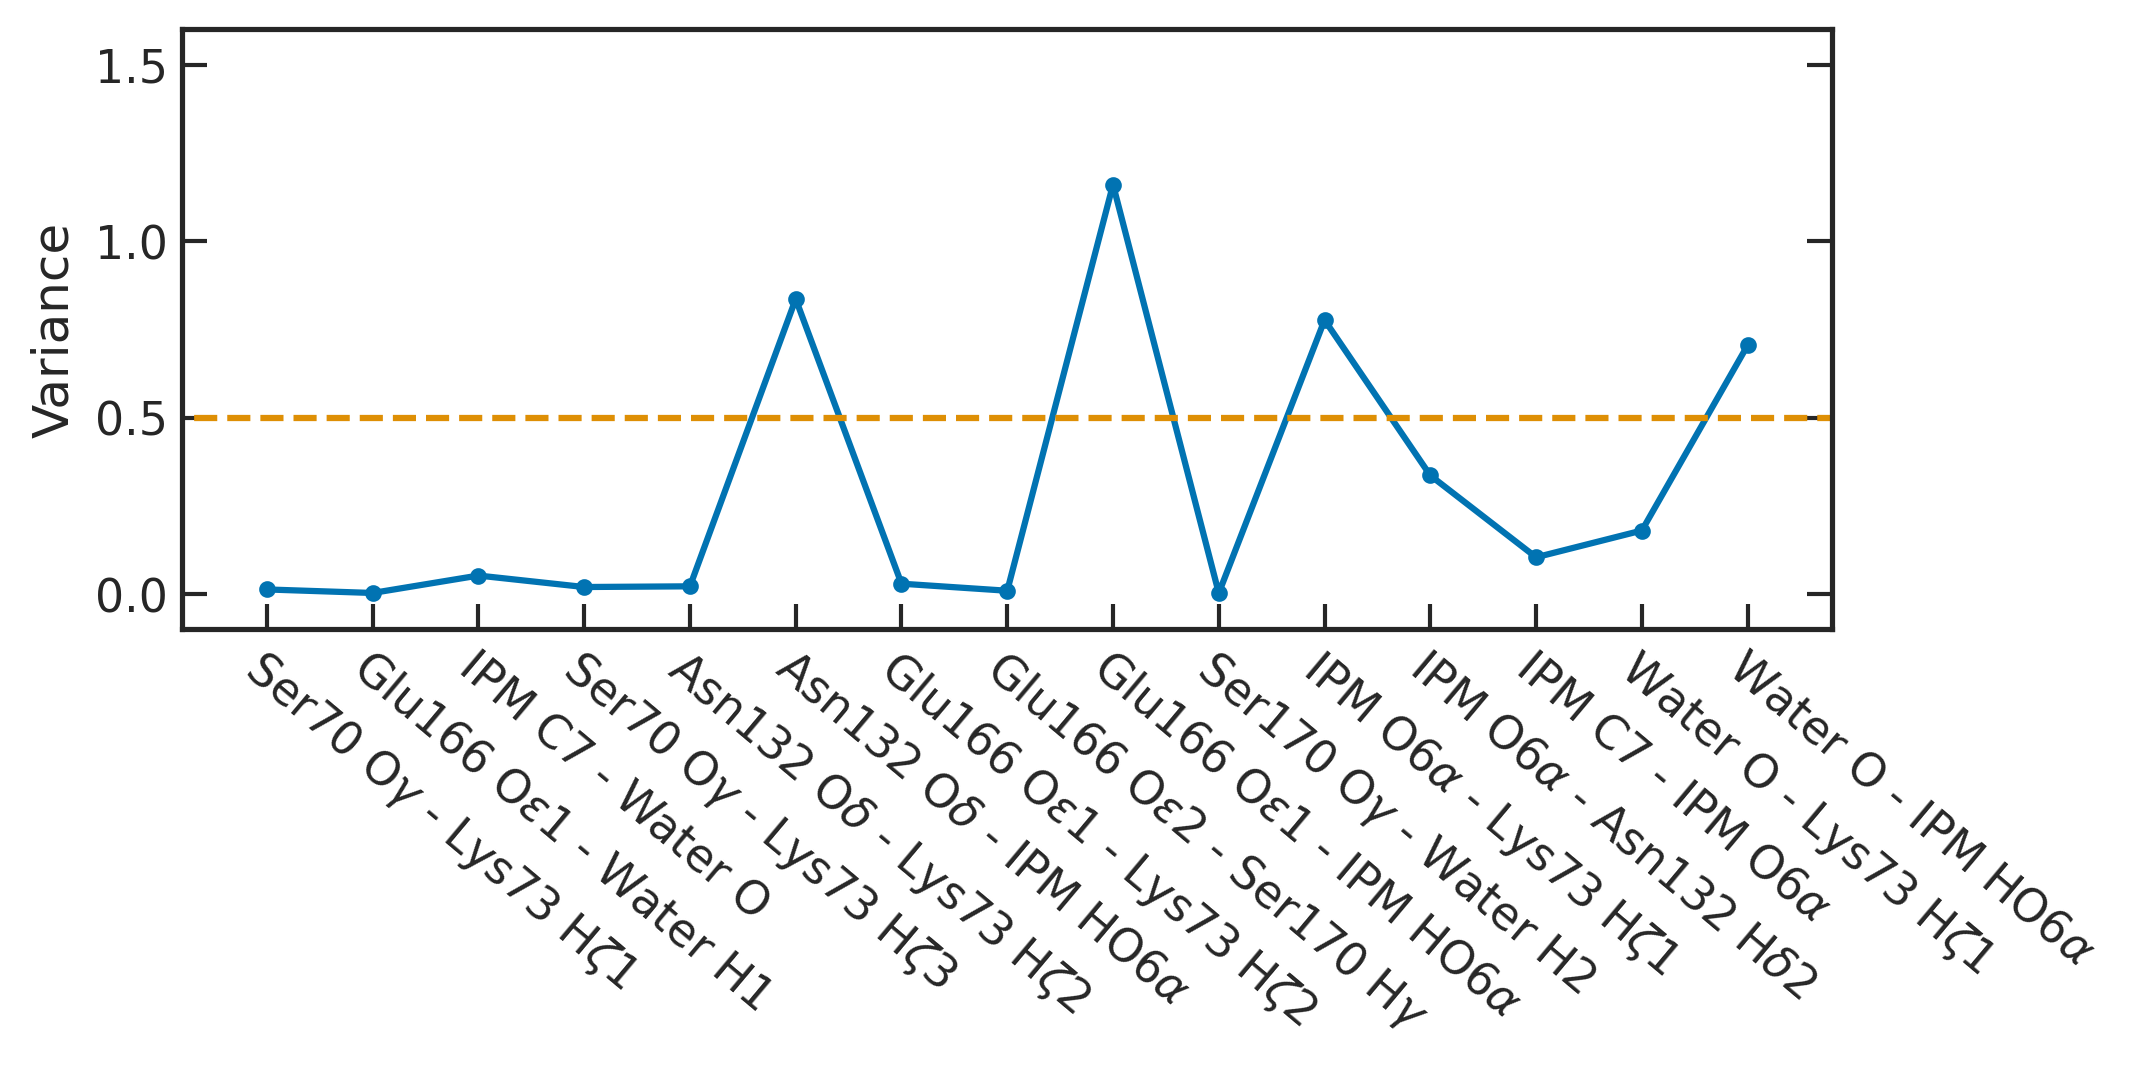

In [3]:
edge = numpy.concatenate((edge1[:, :15], edge2[:, :15]), axis=0)
print("\n=== Variances below 0.5 were discarded, take only hydrogen bonds.\n")
edge_var = numpy.var(edge, axis=0)
for i in range(edge_var.shape[0]):
    print(f"{i:<4}{edge_label[i]:40} {edge_var[i]:<20}")
    
    
fig, ax  = plt.subplots(figsize=(7.5, 4.), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=1./7.5, right=6.5/7.5, top=3.5/4., bottom=1.5/4.)

# =
ax.plot(edge_var[:15], c=sns.color_palette('colorblind')[0], lw=1.5, zorder=1, marker='.')
ax.plot([-1,15], [.5,.5], c=sns.color_palette('colorblind')[1], lw=1.5, zorder=1, ls='--')

ax.set_xticks(numpy.arange(0, len(edge_label)-2))
ax.set_xticklabels(edge_label[:15], ha='left', rotation=-40, rotation_mode="anchor")

ax.tick_params(which='major', direction='in', length=6, width=1)
ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('bottom')
ax.set_xlim(-0.8, 14.8)
ax.set_ylim(-0.1,  1.6)
ax.set_ylabel(r'Variance')

fig.savefig(f'dist_var.png')


=== Pearson Correlations


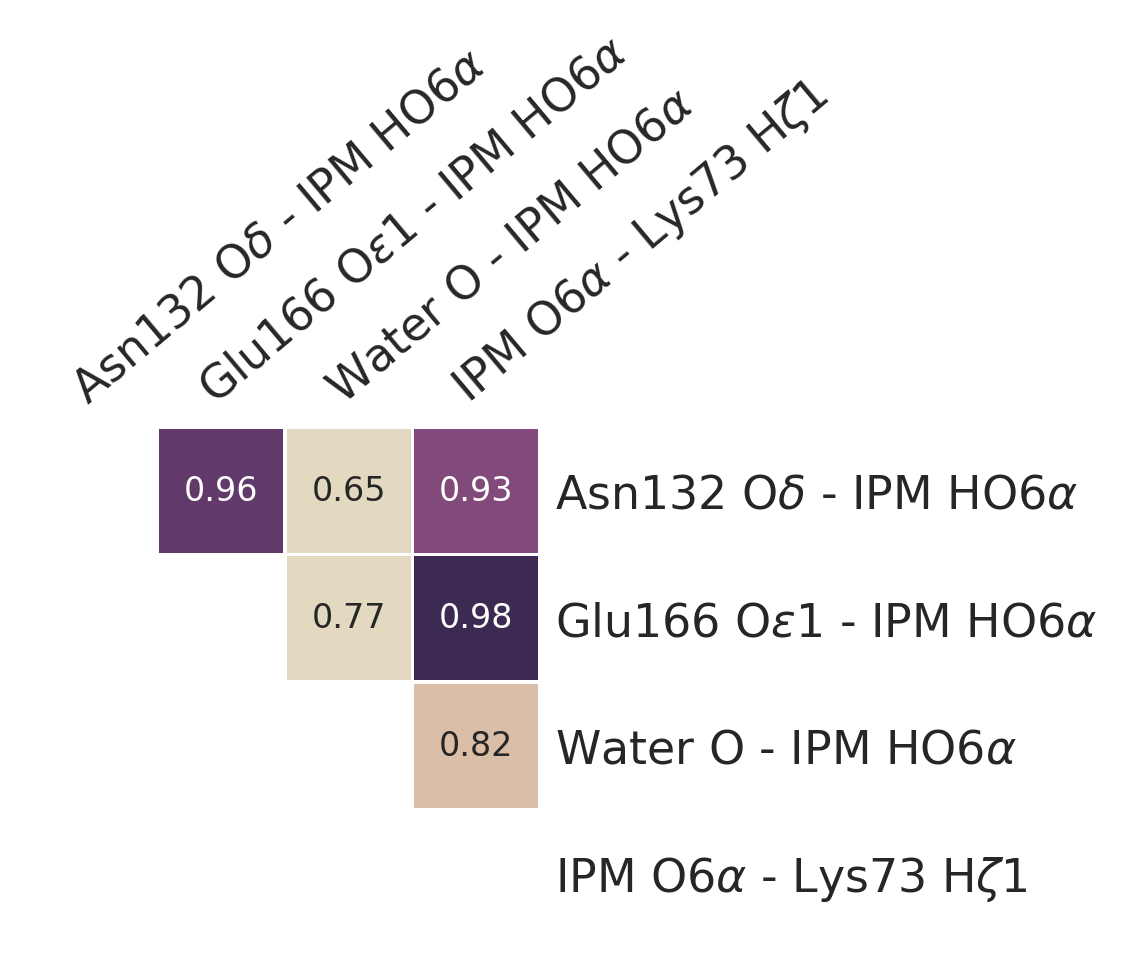

In [13]:
print("\n=== Pearson Correlations")
hbond_index = numpy.asarray([5,8,14,10], dtype=int)
edge_l    = [edge_label[i] for i in hbond_index]


edge_corr = numpy.corrcoef(edge)[hbond_index, :][:, hbond_index]

# Set up the matplotlib figure
fig, ax,  = plt.subplots(figsize=(4.5, 4.5), dpi=300, facecolor='w', edgecolor='k', )
plt.subplots_adjust(left=.1/4.5, right=1.8/4.5, top=1.8/4.5, bottom=.1/4.5)

cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True)
mask = numpy.tril(numpy.ones_like(edge_corr, dtype=bool))
sns.heatmap(edge_corr, mask=mask, cmap=cmap, vmax=1., vmin=.8,
            square=True, linewidths=.5,  annot=True, fmt='.2g', annot_kws={"size":8}, cbar=False)
ax.set_xticklabels(edge_l, rotation=40, ha='left', rotation_mode='anchor')
ax.set_yticklabels(edge_l, rotation=0)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('right')

ax.tick_params(length=0, width=0)

fig.savefig("cluster_metric_pearson.png")

In [5]:
print("\n=== High corrlations > 0.99 were removed")
hbond_index = numpy.asarray([5,8,14,10], dtype=int)
print([edge_list[i] for i in hbond_index])

print("\n=== Cluster metrics")

# metrics
clustered = numpy.zeros(edge.shape)
clustered[numpy.where(edge[:,  5]<=2.2),  5] = 1
clustered[numpy.where(edge[:,  8]<=2.3),  8] = 1
clustered[numpy.where(edge[:, 10]<=3.3), 10] = 1
clustered[numpy.where(edge[:, 14]<=2.0), 14] = 1

clustered = numpy.take(clustered, hbond_index, axis=1)

cluster_metric = numpy.unique(clustered, axis=0)
print(cluster_metric)

print("\n=== Cluster labels")
cluster_labels = []
for i in range(cluster_metric.shape[0]):
    cluster_labels_temp = []
    
    for j in range(clustered.shape[0]):
        
        if numpy.array_equal(cluster_metric[i], clustered[j]):
            cluster_labels_temp.append(j)
            
    cluster_labels_temp = numpy.asarray(cluster_labels_temp)
    cluster_labels.append(cluster_labels_temp)
    print(cluster_labels_temp.shape[0], cluster_metric[i], cluster_labels_temp)

cluster_labels = numpy.asarray(cluster_labels, dtype=object)



=== High corrlations > 0.99 were removed
['ASN.127.OD1:IMI.286.H15O', 'GLU.161.OE1:IMI.286.H15O', 'TIP3.287.OH2:IMI.286.H15O', 'IMI.286.O15:LYS.67.HZ1']

=== Cluster metrics
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 0. 1.]
 [1. 0. 0. 0.]
 [1. 0. 0. 1.]]

=== Cluster labels
741 [0. 0. 0. 0.] [  0   1   2   3   5   6   7   8   9  10  11  16  18  19  20  21  22  23
  24  25  26  28  29  30  31  32  33  34  35  36  37  38  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 150 151 152 153 154 155 156 157 159 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 178 179 180 181 189 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 22

In [6]:
print("\n=== Clusters produced less than 10 members were removed.")
hbond_index = numpy.asarray([5,10], dtype=int)
print([edge_list[i] for i in hbond_index])

print("\n=== Cluster metrics")

# metrics
clustered = numpy.zeros(edge.shape)
clustered[numpy.where(edge[:,  5]<=2.2),  5] = 1
# clustered[numpy.where(edge[:,  8]<=2.3),  8] = 1
# clustered[numpy.where(edge[:, 14]<=2.0), 14] = 1
clustered[numpy.where(edge[:, 10]<=3.3), 10] = 1

clustered = numpy.take(clustered, hbond_index, axis=1)

cluster_metric = numpy.unique(clustered, axis=0)
print(cluster_metric)

print("\n=== Cluster labels")
cluster_labels = []
for i in range(cluster_metric.shape[0]):
    cluster_labels_temp = []
    
    for j in range(clustered.shape[0]):
        
        if numpy.array_equal(cluster_metric[i], clustered[j]):
            cluster_labels_temp.append(j)
            
    cluster_labels_temp = numpy.asarray(cluster_labels_temp)
    cluster_labels.append(cluster_labels_temp)
    print(cluster_labels_temp.shape[0], cluster_metric[i], cluster_labels_temp)

cluster_labels = numpy.asarray(cluster_labels, dtype=object)
cluster_labels

i = 0
for cl in cluster_labels:
    numpy.save(f"cluster_{i}.npy", cl)
    i+=1


=== Clusters produced less than 10 members were removed.
['ASN.127.OD1:IMI.286.H15O', 'IMI.286.O15:LYS.67.HZ1']

=== Cluster metrics
[[0. 0.]
 [0. 1.]
 [1. 0.]
 [1. 1.]]

=== Cluster labels
741 [0. 0.] [  0   1   2   3   5   6   7   8   9  10  11  16  18  19  20  21  22  23
  24  25  26  28  29  30  31  32  33  34  35  36  37  38  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 150 151 152 153 154 155 156 157 159 161 162 163 164
 165 166 167 168 169 170 171 172 173 174 175 178 179 180 181 189 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 236 237 238 239 240 241 242 243 244 245 246 247 24

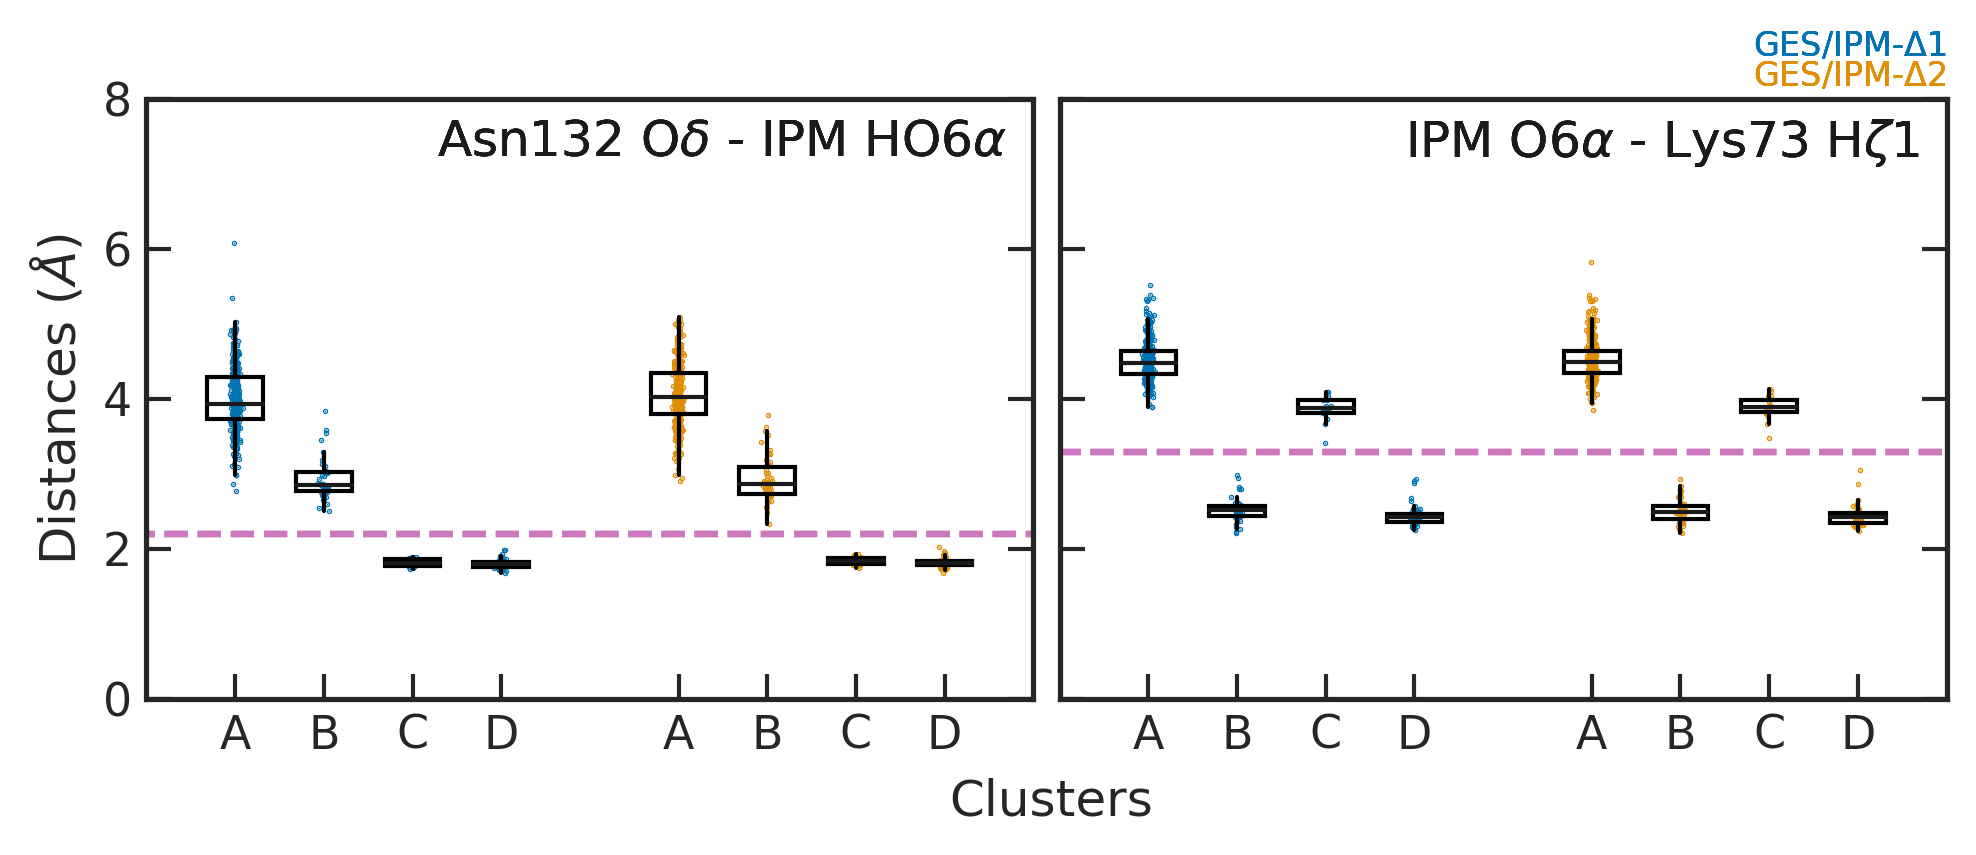

In [7]:

fig, axes = plt.subplots(1, 2, figsize=(7.5, 2.75), dpi=300, facecolor='w', edgecolor='k', sharey=True, sharex=True)
plt.subplots_adjust(left=1./7.5, right=7./7.5, top=2.5/2.75, bottom=.5/2.75, wspace=.03)
                         
n_clusters = cluster_metric.shape[0]

edge1 = edge[:500]
edge2 = edge[500:]
edge_indices = [5,10]

y_d1 = (numpy.arange(n_clusters)-numpy.mean(numpy.arange(n_clusters))) * .8 - 2.
y_d2 = (numpy.arange(n_clusters)-numpy.mean(numpy.arange(n_clusters))) * .8 + 2.

# ===
for i in range(len(edge_indices)):
    ax = axes[i]
    
    for label in range(n_clusters):
        # q = numpy.where(cluster_labels[label]<500)[0]
        d1_cluster_labels = cluster_labels[label][numpy.where(cluster_labels[label]<500)]
        d2_cluster_labels = cluster_labels[label][numpy.where(cluster_labels[label]>=500)]
        
        d1_edge = numpy.asarray(edge[d1_cluster_labels, edge_indices[i]])
        d2_edge = numpy.asarray(edge[d2_cluster_labels, edge_indices[i]])

        d1_boxes = ax.boxplot(x=d1_edge, positions=[y_d1[label]], widths=0.5, showcaps=False, 
                              showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
        d2_boxes = ax.boxplot(x=d2_edge, positions=[y_d2[label]], widths=0.5, showcaps=False, 
                              showfliers=False, medianprops=dict(color='k'), patch_artist=True, vert=True)
        
        plt.setp(d1_boxes["boxes"], facecolor='#00000000')
        plt.setp(d2_boxes["boxes"], facecolor='#00000000')
        
        ax.scatter(y=d1_edge, x=numpy.random.normal(loc=y_d1[label], scale=0.02, size=d1_edge.shape[0]), 
                   s=0.1, color=sns.color_palette('colorblind')[0])
        ax.scatter(y=d2_edge, x=numpy.random.normal(loc=y_d2[label], scale=0.02, size=d2_edge.shape[0]), 
                   s=0.1, color=sns.color_palette('colorblind')[1])
        
        # clustered[numpy.where(edge[:,  5]<=2.2),  5] = 1
        # clustered[numpy.where(edge[:,  8]<=2.3),  8] = 1
        # clustered[numpy.where(edge[:, 10]<=3.3), 10] = 1
        # clustered[numpy.where(edge[:, 14]<=2.0), 14] = 1
        
        if i == 0:
            ax.plot([-10,  10], [2.2, 2.2], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
            ax.set_ylabel(r'Distances ($\AA$)')
            ax.set_xlabel(r'Clusters')
            ax.xaxis.set_label_coords(1.02, -0.13)
        elif i == 1:
            ax.plot([-10,  10], [3.3, 3.3], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
            ax.text(1., 1.06, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
            ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])
            
        # elif i == 2:
        #     ax.plot([-10,  10], [2.0, 2.0], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
        #     ax.set_xlabel(r'Clusters', fontsize='xx-large')
        # elif i == 3:
        #     ax.plot([-10,  10], [3.3, 3.3], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
        #     ax.set_xlabel(r'Clusters', fontsize='xx-large')
            
        ax.text(0.97, 0.97, edge_label[edge_indices[i]], ha='right', va='top', transform=ax.transAxes, color='k')
        ax.set_xlim(-4., 4.)
        ax.set_ylim( 0., 8.)
        ax.tick_params(which='major', direction='in', length=6, width=1)
        ax.yaxis.set_ticks_position('both')
        ax.set_xticks(numpy.concatenate((y_d1, y_d2)))
        ax.set_xticklabels(['A', 'B', 'C', 'D', 'A', 'B', 'C', 'D'])

fig.savefig(f'cluster_metric.png')

In [8]:
def find_center(edge_data):
    """Find the center of each cluster using the minimal distances to all other points."""
    min_idx  = 9999.
    min_dist = 9999.
    
    for i in range(edge_data.shape[0]):
        edge_diff = edge_data-edge_data[i]
        dist = numpy.sum(numpy.sum(edge_diff**2, axis=1)**0.5)
        
        if dist <= min_dist:
            min_dist = dist
            min_idx  = i
    
    return min_idx, min_dist

d1 cluster 0 284 
d2 cluster 0 674
d1 cluster 1 55 
d2 cluster 1 756
d1 cluster 2 12 
d2 cluster 2 512
d1 cluster 3 453 
d2 cluster 3 809


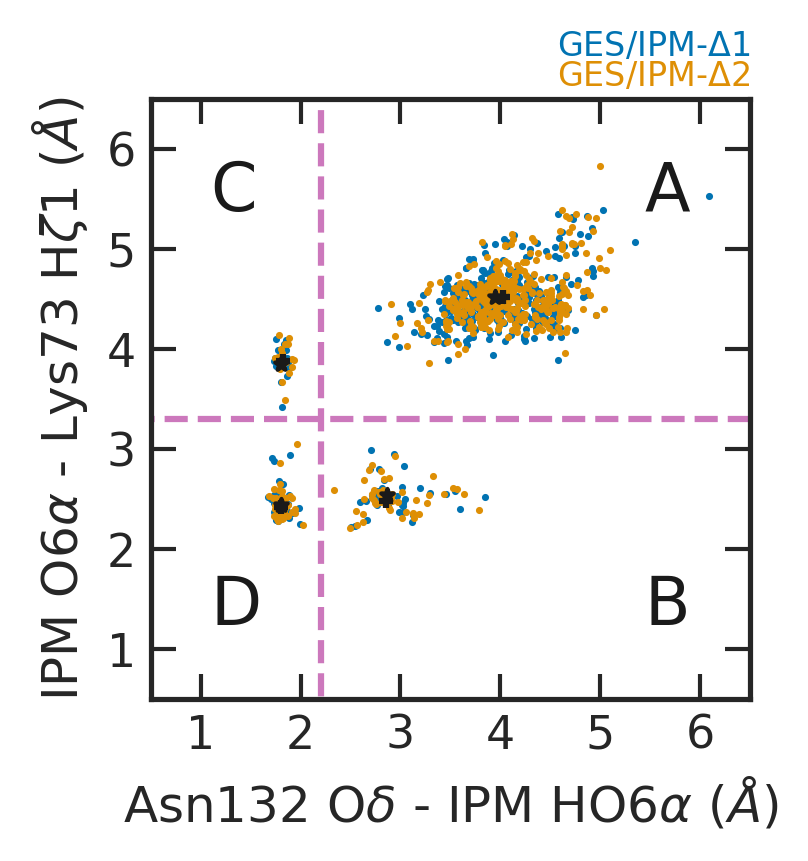

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(2.7, 2.8), dpi=300, facecolor='w', edgecolor='k')
plt.subplots_adjust(left=.5/2.7, right=2.5/2.7, top=2.5/2.8, bottom=.5/2.8)

for cl in range(4):
    d1_cluster_labels = cluster_labels[cl][numpy.where(cluster_labels[cl]< 500)]
    d2_cluster_labels = cluster_labels[cl][numpy.where(cluster_labels[cl]>=500)]

    d1_edge = numpy.asarray(edge[d1_cluster_labels, :])[:, edge_indices]
    d2_edge = numpy.asarray(edge[d2_cluster_labels, :])[:, edge_indices]

    ax.scatter(x=d1_edge[:, 0], y=d1_edge[:, 1], s=.5, color=sns.color_palette('colorblind')[0])
    ax.scatter(x=d2_edge[:, 0], y=d2_edge[:, 1], s=.5, color=sns.color_palette('colorblind')[1])
    
    d1_min_idx, d1_min_dist = find_center(d1_edge)
    d2_min_idx, d2_min_dist = find_center(d2_edge)
    
    ax.scatter(x=d1_edge[d1_min_idx, 0], y=d1_edge[d1_min_idx, 1], s=10, color='k', marker='*')
    ax.scatter(x=d2_edge[d2_min_idx, 0], y=d2_edge[d2_min_idx, 1], s=12, color='k', marker='+')
    
    print('d1 cluster', cl, d1_cluster_labels[d1_min_idx],'\nd2 cluster', cl, d2_cluster_labels[d2_min_idx])

    
ax.text(1., 1.06, r'GES/IPM-$\Delta$1', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[0])
ax.text(1., 1.01, r'GES/IPM-$\Delta$2', ha='right', va='bottom', transform=ax.transAxes, fontsize=8, color=sns.color_palette('colorblind')[1])

ax.text(.9, .9, 'A', ha='right', va='top',    transform=ax.transAxes, fontsize=16, color='k')
ax.text(.9, .1, 'B', ha='right', va='bottom', transform=ax.transAxes, fontsize=16, color='k')
ax.text(.1, .9, 'C', ha='left',  va='top',    transform=ax.transAxes, fontsize=16, color='k')
ax.text(.1, .1, 'D', ha='left',  va='bottom', transform=ax.transAxes, fontsize=16, color='k')

ax.plot([2.2, 2.2], [-10,  10], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')
ax.plot([-10,  10], [3.3, 3.3], c=sns.color_palette('colorblind')[4], lw=1.5, zorder=1, ls='--')

ax.set_xlim(.5, 6.5)
ax.set_ylim(.5, 6.5)

ax.set_ylabel(edge_label[edge_indices[1]]+r" ($\AA$)")
ax.set_xlabel(edge_label[edge_indices[0]]+r" ($\AA$)")

ax.yaxis.set_ticks_position('both')
ax.xaxis.set_ticks_position('both')

ax.set_xticks(numpy.arange(1,7))
ax.set_yticks(numpy.arange(1,7))

ax.tick_params(which='major', direction='in', length=6, width=1)


fig.savefig(f'cluster_metric_cross.png')